In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("/kaggle/input/capstone-preprocessed/preprocessed_df_capstone.csv")
print("DF loaded")
df['work_interfere'].fillna(0, inplace=True)
print(df['work_interfere'].unique())

DF loaded
[3. 1. 0. 2.]


/tmp/ipykernel_13/577669839.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['work_interfere'].fillna(0, inplace=True)


In [2]:
features = ['Age',
    'support_score','benefits','care_options',
    'wellness_program','seek_help','anonymity',
    'leave','coworkers','supervisor',
    'mental_health_interview','mental_vs_physical',
    'family_history','treatment','work_interfere'
]

In [3]:
from sklearn.preprocessing import StandardScaler

X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# trying k-means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
clusters = [2,3,4,5,6]
for n_clusters in clusters:
    kmeans = KMeans(n_clusters = n_clusters,random_state = 42)
    labels = kmeans.fit_predict(X_scaled)
    sil_score = silhouette_score(X_scaled, labels)
    print(f"KMeans Silhouette Score: {sil_score:.3f} for n = {n_clusters}")

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans Silhouette Score: 0.169 for n = 2
KMeans Silhouette Score: 0.135 for n = 3
KMeans Silhouette Score: 0.121 for n = 4


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans Silhouette Score: 0.111 for n = 5
KMeans Silhouette Score: 0.106 for n = 6


In [5]:
df['cluster'] = KMeans(n_clusters=2, random_state=42).fit_predict(X_scaled)
cluster_summary = df.groupby('cluster')[features].mean().round(2)
print(cluster_summary)

           Age  support_score  benefits  care_options  wellness_program  \
cluster                                                                   
0        31.33           2.77      0.77          0.68              0.11   
1        33.36           7.77      1.65          1.46              1.24   

         seek_help  anonymity  leave  coworkers  supervisor  \
cluster                                                       
0             0.31       1.08   2.01        0.9        0.95   
1             1.37       1.55   2.78        1.1        1.37   

         mental_health_interview  mental_vs_physical  family_history  \
cluster                                                                
0                           0.20                0.80            0.35   
1                           0.28                1.37            0.46   

         treatment  work_interfere  
cluster                             
0             0.47            1.22  
1             0.57            1.21  


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


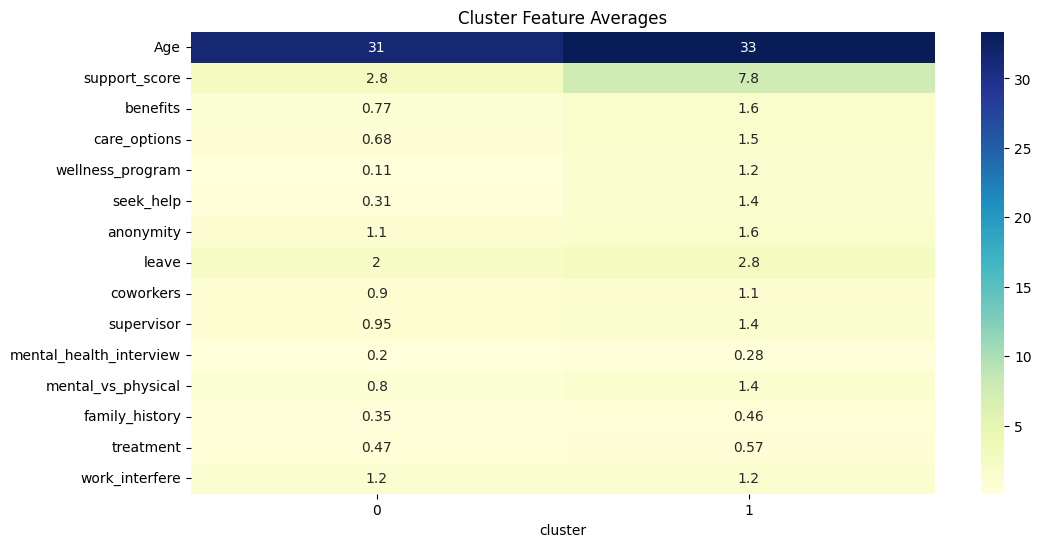

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(cluster_summary.T, cmap="YlGnBu", annot=True)
plt.title("Cluster Feature Averages")
plt.show()

In [7]:
# this suggests that cluster - 0 : More open about mental health and mostly aware
# cluster - 1 : Silent sufferers and tend to not share

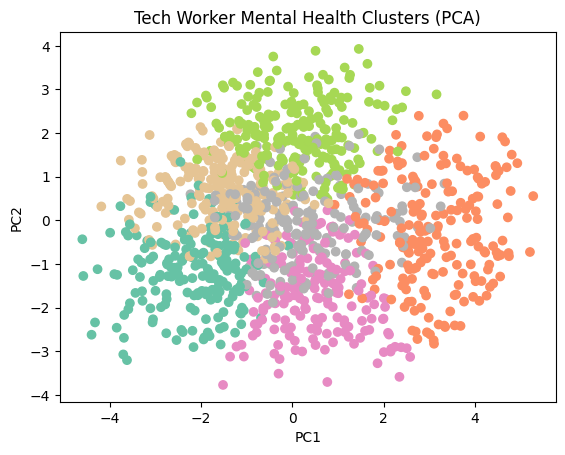

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='Set2')
plt.title("Tech Worker Mental Health Clusters (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [9]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Try different numbers of clusters
for n in range(2, 7):
    agglo = AgglomerativeClustering(n_clusters=n)
    labels = agglo.fit_predict(X_scaled)
    sil_score = silhouette_score(X_scaled, labels)
    print(f"Agglomerative Silhouette Score for n = {n}: {sil_score:.3f}")

Agglomerative Silhouette Score for n = 2: 0.156
Agglomerative Silhouette Score for n = 3: 0.092
Agglomerative Silhouette Score for n = 4: 0.080
Agglomerative Silhouette Score for n = 5: 0.062
Agglomerative Silhouette Score for n = 6: 0.053


In [10]:
agglo = AgglomerativeClustering(n_clusters=2)
labels = agglo.fit_predict(X_scaled)
df['cluster'] = labels

In [11]:
cluster_summary = df.groupby('cluster')[features].mean().round(2)
print(cluster_summary)

           Age  support_score  benefits  care_options  wellness_program  \
cluster                                                                   
0        31.17           3.21      0.83          0.74              0.17   
1        34.32           7.95      1.74          1.51              1.40   

         seek_help  anonymity  leave  coworkers  supervisor  \
cluster                                                       
0             0.36       1.14   2.15       0.95        1.02   
1             1.52       1.52   2.63       1.02        1.29   

         mental_health_interview  mental_vs_physical  family_history  \
cluster                                                                
0                           0.24                0.89            0.38   
1                           0.20                1.30            0.41   

         treatment  work_interfere  
cluster                             
0             0.46            1.17  
1             0.63            1.34  


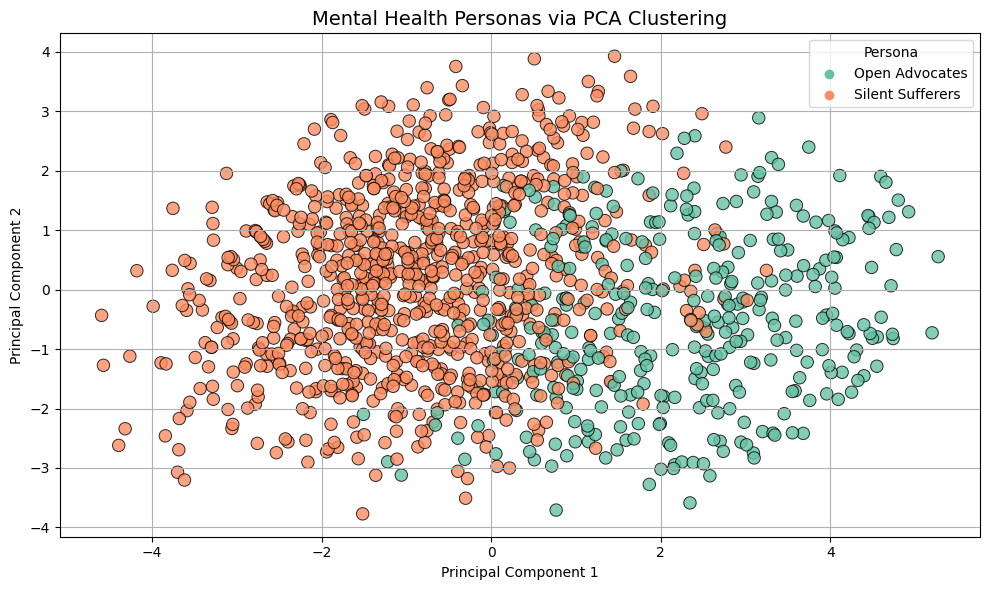

In [12]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

cluster_labels = {
    0: 'Silent Sufferers',
    1: 'Open Advocates'
}
df['cluster_name'] = df['cluster'].map(cluster_labels)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='cluster_name',
    data=df,
    palette='Set2',
    s=80,
    edgecolor='black',
    alpha=0.8
)
plt.title("Mental Health Personas via PCA Clustering", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Persona')
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
# By both KMeans and agglomerative clustering we are getting 
# only two clusters which are silent sufferers and open advocates
# lets do DBSCAN

In [14]:
from sklearn.cluster import DBSCAN
for eps in np.arange(0.5, 2.1, 0.3):
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X_scaled)
    
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    
    if n_clusters > 1:
        sil_score = silhouette_score(X_scaled, labels)
        print(f"DBSCAN (eps={eps:.1f}): {n_clusters} clusters, Silhouette = {sil_score:.3f}")
    else:
        print(f"DBSCAN (eps={eps:.1f}): only 1 cluster or all noise")

DBSCAN (eps=0.5): only 1 cluster or all noise
DBSCAN (eps=0.8): only 1 cluster or all noise
DBSCAN (eps=1.1): 3 clusters, Silhouette = -0.184
DBSCAN (eps=1.4): 7 clusters, Silhouette = -0.254
DBSCAN (eps=1.7): 15 clusters, Silhouette = -0.233
DBSCAN (eps=2.0): 15 clusters, Silhouette = -0.166


In [15]:
# this suggest that DBSCAN did not work well with our dataset
